# K-means (BaseRS)

## 1 - Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import seaborn as sns
from matplotlib import pyplot as plt

from pprint import pprint

## 2 - Carregamento e pré-processamento da base de dados

In [2]:
DATASET_PATH = "dataset/BaseRS.csv"
dataframe = pd.read_csv(DATASET_PATH)
dataframe_without_target = dataframe.drop(["target"], axis=1)

In [3]:
dataframe.head()

,Altura,Peso,target
0,1.90,100,B
1,1.90,80,V
2,1.75,67,F
3,1.60,70,F
4,1.71,60,F


In [4]:
dataframe_without_target.head()

,Altura,Peso
0,1.90,100
1,1.90,80
2,1.75,67
3,1.60,70
4,1.71,60


## 3 - Visualização dos dados

Pelo o gráfico, dá para observar que existem 3 regiões onde os dados estão concetrados, visto que nessa base de dados existem 3 grupos, jogadores de Basquete (B), Vôlei (V) e Futebol (F).

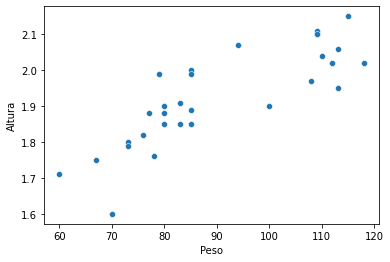

In [5]:
sns.scatterplot(
    x=dataframe_without_target["Peso"], 
    y=dataframe_without_target["Altura"],
)

## 4 - Rodando o algoritmo de clusterização K-means

O algoritmo K-means será rodado para 3 clusters, visto que temos 3 grupos no gŕafico visualizado acima. Além disso, no target da base de dados, temos 3 valores (B, V e F)

In [6]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(dataframe_without_target)
print(f"Labels do k-means: {kmeans.labels_}")
print(f"Centróides do k-means:\n{kmeans.cluster_centers_}")

Labels do k-means: [1 0 2 2 2 1 0 0 1 1 2 0 0 0 1 1 1 1 0 0 1 0 0 0 0 2 0 1 1 0]
Centróides do k-means:
[[  1.90285714  82.14285714]
 [  2.03818182 110.54545455]
 [  1.73        68.6       ]]


## 5 - Visualizando os resultados

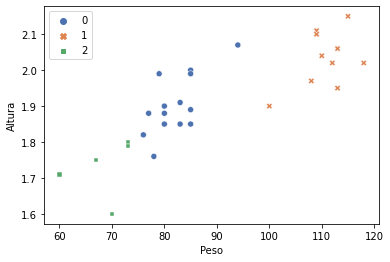

In [7]:
sns.scatterplot(
    x=dataframe_without_target["Peso"], 
    y=dataframe_without_target["Altura"],
    hue=kmeans.labels_,
    style=kmeans.labels_,
    palette="deep",
)

## 6 - Checando se o agrupamento realizado está correto

O agrupamento do K-means acabou juntando jogadores de vôlei e futebol na label 0, onde é a região de pesos e alturas médias. Também juntou jogadores de vôlei e basquete na label 1, onde são alturas e pesos altos. E juntou apenas jogadores de futebol na label 2, onde tem pesos e alturas baixas. 

Apesar da base de dados possuir 3 targets, jogadores de vôlei, futebol e basquete, o algoritmo não conseguiu agrupar essas três categorias, esse resultado se dá pela falta de características representativas na base de dados, visto que é bem difícil agrupar em diferentes grupos baseado apeans em altura e peso.

In [8]:
dataframe_labels_0 = dataframe[kmeans.labels_ == 0]
dataframe_labels_1 = dataframe[kmeans.labels_ == 1]
dataframe_labels_2 = dataframe[kmeans.labels_ == 2]

player_types_per_label = {
    "label 0": np.unique(dataframe_labels_0["target"]).tolist(),
    "label 1": np.unique(dataframe_labels_1["target"]).tolist(),
    "label 2": np.unique(dataframe_labels_2["target"]).tolist(),
}
amount_of_player_types_per_label = {
    "label 0": {
        "B": len(dataframe_labels_0[dataframe_labels_0["target"] == "B"]),
        "V": len(dataframe_labels_0[dataframe_labels_0["target"] == "V"]),
        "F": len(dataframe_labels_0[dataframe_labels_0["target"] == "F"]),
    },
    "label 1": {
        "B": len(dataframe_labels_1[dataframe_labels_1["target"] == "B"]),
        "V": len(dataframe_labels_1[dataframe_labels_1["target"] == "V"]),
        "F": len(dataframe_labels_1[dataframe_labels_1["target"] == "F"]),
    },
    "label 2": {
        "B": len(dataframe_labels_2[dataframe_labels_2["target"] == "B"]),
        "V": len(dataframe_labels_2[dataframe_labels_2["target"] == "V"]),
        "F": len(dataframe_labels_2[dataframe_labels_2["target"] == "F"]),
    },
}

print("Tipo de jogador por label (agrupamento do kmeans):")
pprint(player_types_per_label)
print("Quantidade de jogador por tipo por label (agrupamento do kmeans):")
pprint(amount_of_player_types_per_label)

Tipo de jogador por label (agrupamento do kmeans):
{'label 0': ['F', 'V'], 'label 1': ['B', 'V'], 'label 2': ['F']}
Quantidade de jogador por tipo por label (agrupamento do kmeans):
{'label 0': {'B': 0, 'F': 6, 'V': 8},
 'label 1': {'B': 10, 'F': 0, 'V': 1},
 'label 2': {'B': 0, 'F': 5, 'V': 0}}
